# Analyze A/B Test Results Project


- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)

<a id='intro'></a>
## Introduction

In this project, I am going to perform A/B test and regression to see if the feature change on the e-commercewebsite will lead to the change of conversion rate. In this project, I am going to focus on whether receiving new page will lead to increase of conversion rate. I will run both ab_test and regression on my data to know if we need to use new webpage or stay with the old page. Later, I am going to add other factors to consider in the regression such as country to see if it is realted to the conversion rate. 




<a id='probability'></a>
## Part I - Probability

import libraries 

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


find the number of rows in the dataset

In [3]:
df.shape

(294478, 5)

unique users in the dataset

In [4]:
df['user_id'].nunique()

290584

The proportion of users converted

In [5]:
df['converted'].mean()

0.11965919355605512

check the number of times the group is 'treatment' but 'landing_page' is not 'new_page'

In [6]:
treatment_old = df.query("group == 'treatment' and landing_page == 'old_page'").shape[0]
treatment_old

1965

check if rows have missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


#select all the rows having group and landing_page matched each other


In [8]:
df2=df.query("group == 'treatment' and landing_page == 'new_page'")

saved all the rows having treatment group match with new_page to a new dataframe df2

In [9]:
df_control_old= df.query("group == 'control' and landing_page == 'old_page'")

saved all the rows having control group match with old_page to a new dataframe df_control_old

In [10]:
df_control_old

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0


#append the rows in df_control_old to df2 

In [11]:
df2 = df2.append(df_control_old)
df2

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0


double check group and landing_page match with each other 

In [12]:
# Double Check all of the incorrect rows were removed from df2 
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

find unique 'user_ids' in df2, see if there is duplicates needed to be removed later

In [13]:
df2.user_id.nunique()

290584

 find one dupliate and list below  

In [14]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [15]:
df2.shape[0]

290585

find the index of the rows that duplicates exist

In [16]:
indexes=df2[df2['user_id'].duplicated()].index

remove the row of duplicates

In [17]:
df2.drop(indexes)
df2.shape[0]

290585

#calculate the 'converted' success rate in population and saved it to a new variable named p_population, note 'converted'==1 means success

In [18]:
p_population=df2['converted'].mean()
p_population

0.11959667567149027

the probability of converted rate conditioned on group=='control' 

In [19]:
df2_control=df2.query("group == 'control'")
df2_control_converted=df2_control['converted'].mean()
df2_control_converted

0.1203863045004612

the probability of converted rate conditioned on group =='treatment' 

In [20]:
df2_treatment=df2.query("group == 'treatment'")
df2_treatment_converted=df2_treatment['converted'].mean()
df2_treatment_converted

0.11880724790277405

#calculate the difference of converted rate between these two groups and saved to a new variable named obs_diff

In [21]:
obs_diff=df2_treatment_converted-df2_control_converted
obs_diff

-0.0015790565976871451

how many individual received the new page

In [22]:
prob_new=df2.query("landing_page=='new_page'")
prob_new

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0


In [23]:
probability_new=df2.query("landing_page=='new_page'").shape[0]
probability_new

145311

In [24]:
df2.shape[0]

290585

In [25]:
probability_new_page=probability_new/df2.shape[0]
probability_new_page

0.5000636646764286

#from the calculation of conversion rate for control and treatment group, we can see that conversion rate for control group is higher than conversion rate for treatment group. So the new treatment group users cannot lead to more conversions.

##if now I want to assume that the old page is better unless the new page proves to be definitely better at a type I error rate of 5%, my null hypothesis would be conversion rate of new page is smaller or equal than the conversion rate of old page. My alternative hypothesis would be conversion rate of new page is greater than conversion rate of old page. 

#                                  𝐻0: 𝑝𝑛𝑒𝑤 <= 𝑝𝑜𝑙𝑑
#                                  𝐻1: 𝑝𝑛𝑒𝑤 > 𝑝𝑜𝑙𝑑

## Null hypothesis testing 

#conversion rate of new_page under the null

In [26]:
pnew=df2['converted'].mean()
pnew

0.11959667567149027

#conversion rate of old_page under the null

In [27]:
pold=df2['converted'].mean()
pold

0.11959667567149027

#nnew is the number of individuals in the treatment group

In [28]:
nnew=df2_treatment.shape[0]
nnew

145311

#nold is the number of individuals in the control group

In [29]:
nold=df2_control.shape[0]
nold

145274

#Simulate sample for treatment group; saved the conversion rate to new_page_converted

In [30]:
new_page_converted=np.random.choice([1,0], size=nnew, p=[pnew, (1-pnew)]).mean()
new_page_converted

0.12019736977930094

#simulate sample for the control group; saved  the conversion rate to old_page_converted

In [31]:
old_page_converted=np.random.choice([1,0],size=nold, p=[pold, (1-pold)]).mean()
old_page_converted

0.11892010958602366

find the 'converted' rate difference between two simulated sample

In [32]:
p_diff=new_page_converted-old_page_converted
p_diff

0.0012772601932772853

##now, using the same process above but this time, we want to use bootstaping the sample for 100000 times; save the result of each bootstrap in the new list called p_difffs

In [33]:
p_diffs = []
for _ in range(10000):
    
    new_page_conver = np.random.choice([1, 0], size=nnew, p=[pnew, (1-pnew)]).mean()
    old_page_conver=np.random.choice([1,0],size=nold, p=[pold, (1-pold)]).mean()
    p_diffs.append(new_page_conver-old_page_conver)
    
p_diffs

[-0.0021710711952533657,
 7.977764864594561e-05,
 -0.0018061767489050418,
 0.0009399963239464793,
 0.000307199269644412,
 0.0013049959341717293,
 0.0015250853117626667,
 0.0005198249489816592,
 0.0016418882244706862,
 -0.0009802513506796673,
 -0.000898069475796584,
 0.0008437090835274191,
 -0.000794385140912568,
 0.0014423267882876928,
 0.0011810868803915908,
 -0.0005601956559794924,
 -0.0007597132738804274,
 -0.0003058217649698214,
 -0.0012831220372522545,
 0.00032061230632385307,
 0.002020719774151844,
 0.0010295349804750331,
 -0.0011797829904308527,
 -0.0007531645013561378,
 0.0009881548423718856,
 0.0021376681635563166,
 -0.00021627785024741497,
 0.0019378630977250622,
 -0.0007532398688012698,
 0.0011188370182804719,
 0.0007196931131390749,
 0.000320687673768999,
 -0.0004914355814322618,
 -4.4129652402899455e-05,
 0.0002862576836538261,
 0.0011810693530787814,
 0.000864542000178492,
 0.0005063312866632336,
 -0.0013242813312138169,
 -0.0011384256378344088,
 -0.001613532158815642,
 0

#histgram for p_diffs

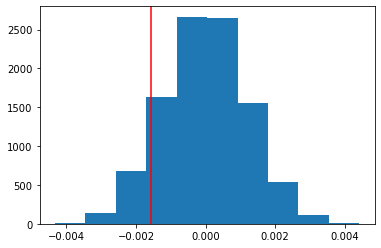

In [34]:
plt.hist(p_diffs)
plt.axvline(x=obs_diff, color='red')


#convert list number in p_diffs to array list to do calculation

In [35]:
diffs=np.array(p_diffs)

In [36]:
(diffs > obs_diff).mean()

0.9013

#There are 90% of p_diffs greater than the actual difference observed in the df2. The value we calculated above is p value which is the conditional probability of the data given the null hypothesis is true. The smaller the p_diffs, more likely to reject the null hypothesis. To see whether reject the null hypothesis or not, compare the p value to type I error we set. Here because our type I error is 0.05, our p value is 0.9, so our p value is too big. So in this case, we cannot reject the null hypothesis.


# Using Built-in Methods for Hypothesis Testing<br>
We could also use a built-in to achieve similar results.


In [37]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2_control.query('converted==1').shape[0]

# number of conversions with the new_page
convert_new =df2_treatment.query('converted==1').shape[0]

# number of individuals who were shown the old_page
n_old = nold
# number of individuals who received new_page
n_new =nnew

In [38]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative= 'larger')
print(z_score, p_value)


-1.3116075339133115 0.905173705140591


#p value and z score calculated using built-in methods are 0.9 and -1.31. The p value calculated using this method is almost the same to the one using bootstraping. Beucase the p value is 0.9 which is too big, we cannot reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

In this final part, we will see that the result achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

#because my dependent variable is conversion or not conversion, I need to use logistic regression; to perfrom this regression, first I am going to create intercept and dummy variable for two groups, new_page would be 1 and old_page would be 0

In [39]:
import statsmodels.api as sm 

In [40]:
df2['intercept']=1

#below, created the dummy variables (new_page and old_page) for the categorical variable named landing_page, the columns created are named as ab_page and ab_page1, later drop any of the column, here I choose drop ab_page1, only ab_page left (in which, 1 means new_page, and 0 means old_page)  

In [41]:
df2[['ab_page', 'ab_page1']]=pd.get_dummies(df['landing_page'])
df2=df2.drop('ab_page1', axis=1)
df2

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1
...,...,...,...,...,...,...,...
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0


Use statmodels to fit regression model to predict whether ot not an individual converts

In [42]:
logit_mod=sm.Logit(df2['converted'],df2[['intercept', 'ab_page']])
results=logit_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Jan 2022   Pseudo R-squ.:               8.085e-06
Time:                        03:22:00   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

To inteprete the coefficient in logistic regression, first need to exponentiate the coefficient of each indepedent variable

In [43]:
np.exp(-0.015)

0.9851119396030626

#here 0.985 means that conversion rate is 0.98 times more likely on new_page than old_page holding all else constant

#p value associated with the page is 0.19, which is big. The p valve found in the regression is different from the p value in the A/B test, because the p value in the regression is the p value for the coefficient for variable ab_page. In regression, p value is always given for testing if parameter of intercept and slope are equal to 0 in null hypothesis. The null and alternative hypothesis test are two-sided. 

p_value is 0.19 which is significantly bigger than type I error, so there is no signicant relationship between landing_page and conversion rate. 

#Because landing_page does not influence whether or not an individual converts, so we can consider other factors that may lead to the conversion. Once we decide to add other fators, our regression would be complicated. 

read countries.csv file and saved it to a new dataframe called df3

In [44]:
df3=pd.read_csv('countries (1).csv')
df3

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK
...,...,...
290579,653118,US
290580,878226,UK
290581,799368,UK
290582,655535,CA


#join df3 and df2 using the key 'user_id'; the joint data frame is named as df_merged

In [45]:
df_merged=df2.set_index('user_id').join(df3.set_index('user_id'))
df_merged

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US
...,...,...,...,...,...,...,...
945994,2017-01-03 14:41:21.565258,control,old_page,0,1,0,UK
945996,2017-01-09 18:58:19.952277,treatment,new_page,0,1,1,US
945997,2017-01-04 06:56:24.658147,control,old_page,0,1,0,US


In [46]:
df_merged[['CA', 'UK', 'US']]=pd.get_dummies(df_merged['country'])
df_merged
df_merged.drop('US', axis=1)


,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK
user_id,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US,0,0
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US,0,0
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US,0,0
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US,0,0
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US,0,0
...,...,...,...,...,...,...,...,...,...
945994,2017-01-03 14:41:21.565258,control,old_page,0,1,0,UK,0,1
945996,2017-01-09 18:58:19.952277,treatment,new_page,0,1,1,US,0,0
945997,2017-01-04 06:56:24.658147,control,old_page,0,1,0,US,0,0


In [47]:
df_merged['intercept']=1
logit_mod=sm.Logit(df_merged['converted'], df_merged[['intercept', 'UK', 'CA']])
results=logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Sat, 15 Jan 2022   Pseudo R-squ.:               1.521e-05
Time:                        03:22:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.315      0.000      -2.010      -1.983
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
==============================================================================
"""

#to inteprete coefficient in logistic regression, first need to exponentiate each coefficient

In [48]:
np.exp(0.0099), np.exp(-0.0408)

(1.0099491671175422, 0.9600211149716509)

#slope intepretation for UK: conversion is 1 time as likely in UK than US holding all else constant
#slope intepreation for CA: conversion is 0.96 time as likely in CA than US holding all else constant

Now, after looking at the individual factors of country and page on conversion, now take look at an interaction between page and country, we need to create the  interation  term for UK and ab_page, CA and ab_page. To add interaction term in the regression, we also need to keep our lower term (here is ab_page, UK, CA) 

In [49]:
df_merged['ab_UK'] = df_merged['ab_page'] * df_merged['UK']
df_merged['ab_CA'] = df_merged['ab_page'] * df_merged['CA']
lm3 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'ab_page', 'UK' , 'CA', 'ab_UK', 'ab_CA']])
results = lm3.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            5
Date:                Sat, 15 Jan 2022   Pseudo R-squ.:               3.483e-05
Time:                        03:22:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1918
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.506      0.132      -0.047       0.006
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
ab_UK          0.0314      0.027      1.181      0.238      -0.021       0.084
ab_CA         -0.0469      0.054     -0.872      0.383      -0.152       0.059
==============================================================================
"""

#the p value for interaction term (ab_UK and ab_CA) is too big to be significant compare to the type I error 0.05. In regression, the null hypothesis for the coefficient is equal to 0, and alternative hypothesis for the coefficient is not equal to 0. Because p value is big, so we cannot reject our null hypothesis that coefficient for ab_UK and ab_CA is not significant to predicted the conversion. So there is no significant relationship between the interaction terms with converson. 

## conclusion: 

Based on both the A/B test and logistic regression, the p value is too big to be significantly important. Large p value means that we cannot reject our null hypothesis that convsersion is not related to landing_page (new_page & old_page).Later, adding other factor (country) to run the regression. However, the p value related to the ciefficient is too big to be significantly important. So it can be conclude that both landing_page and country has no effect on conversion.  
